In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
df = pd.read_csv('/content/loan_data.csv')  # Adjust path as needed
df.head()

,Age,Income,Education,Credit_Score,Employment_Status,Loan_Status
0,25,50000,Graduate,700,Employed,Y
1,35,60000,Not Graduate,650,Self-employed,N
2,45,80000,Graduate,800,Employed,Y
3,29,45000,Graduate,600,Unemployed,N
4,62,90000,Not Graduate,750,Employed,Y


In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                10 non-null     int64 
 1   Income             10 non-null     int64 
 2   Education          10 non-null     object
 3   Credit_Score       10 non-null     int64 
 4   Employment_Status  10 non-null     object
 5   Loan_Status        10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes
None
             Age        Income  Credit_Score
count  10.000000     10.000000     10.000000
mean   38.200000  64100.000000    694.000000
std    11.602682  14417.967186     56.999025
min    25.000000  45000.000000    600.000000
25%    29.250000  52500.000000    657.500000
50%    35.500000  63000.000000    695.000000
75%    44.250000  71500.000000    717.500000
max    62.000000  90000.000000    800.000000
Age                  0
Income               0
Education   

In [ ]:
le = LabelEncoder()

# Encode Education and Employment_Status
df['Education'] = le.fit_transform(df['Education'])  # Graduate=1, Not Graduate=0
df['Employment_Status'] = le.fit_transform(df['Employment_Status'])  # Employed=0, Self-employed=2, Unemployed=1
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})  # Yes = 1, No = 0

df.head()

,Age,Income,Education,Credit_Score,Employment_Status,Loan_Status
0,25,50000,0,700,0,1
1,35,60000,1,650,1,0
2,45,80000,0,800,0,1
3,29,45000,0,600,2,0
4,62,90000,1,750,0,1


In [ ]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


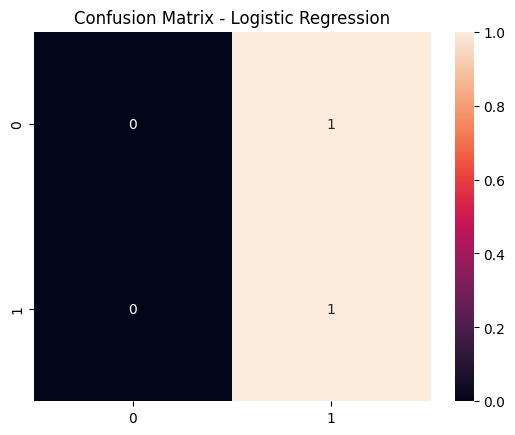

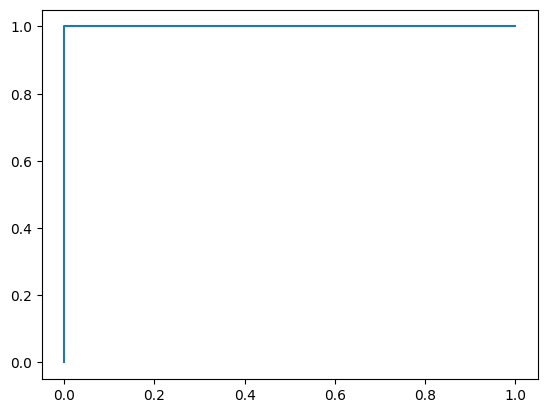

In [ ]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


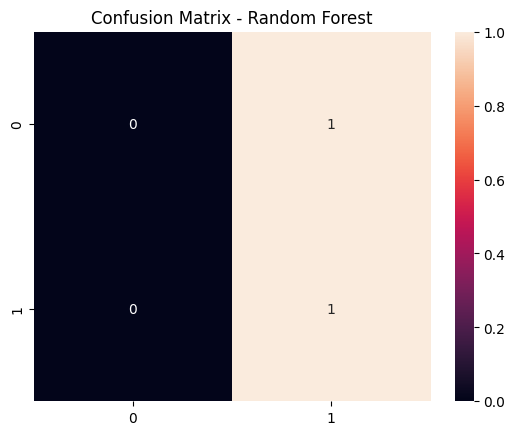

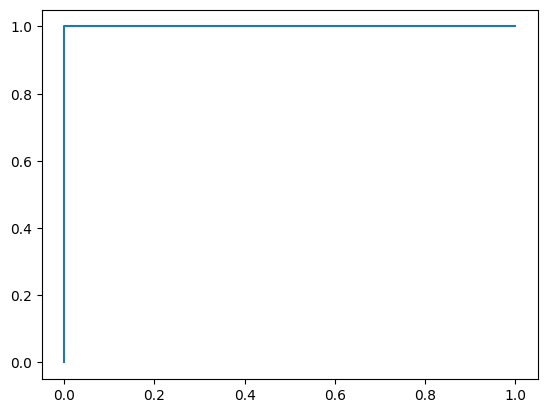

In [ ]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Confusion Matrix - Random Forest')
plt.show()

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr_rf, tpr_rf, label='Random Forest')

<ipython-input-10-712625524>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


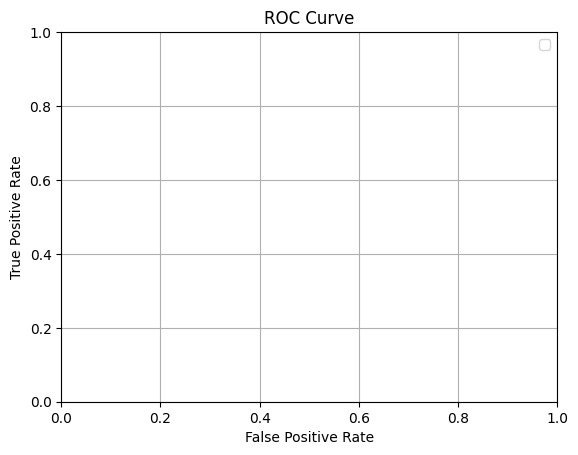

In [ ]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import joblib
joblib.dump(rf, 'loan_eligibility_model.pkl')

['loan_eligibility_model.pkl']